In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/concrete.csv")

In [ ]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
214,156.0,243.0,0.0,180.0,11.0,1022.0,698.0,28,37.36
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
410,296.0,0.0,107.0,221.0,11.0,819.0,778.0,28,31.42
623,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30
1019,288.0,192.0,0.0,192.0,0.0,932.0,717.8,7,23.52
854,387.0,20.0,94.0,157.0,11.6,938.0,845.0,3,34.77
970,231.8,0.0,121.6,174.0,6.7,1056.4,778.5,28,33.73
113,385.0,0.0,0.0,186.0,0.0,966.0,763.0,28,31.35
860,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
518,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28,33.69


In [ ]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.corr(numeric_only=True)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### Linear reg may not work

<Axes: >

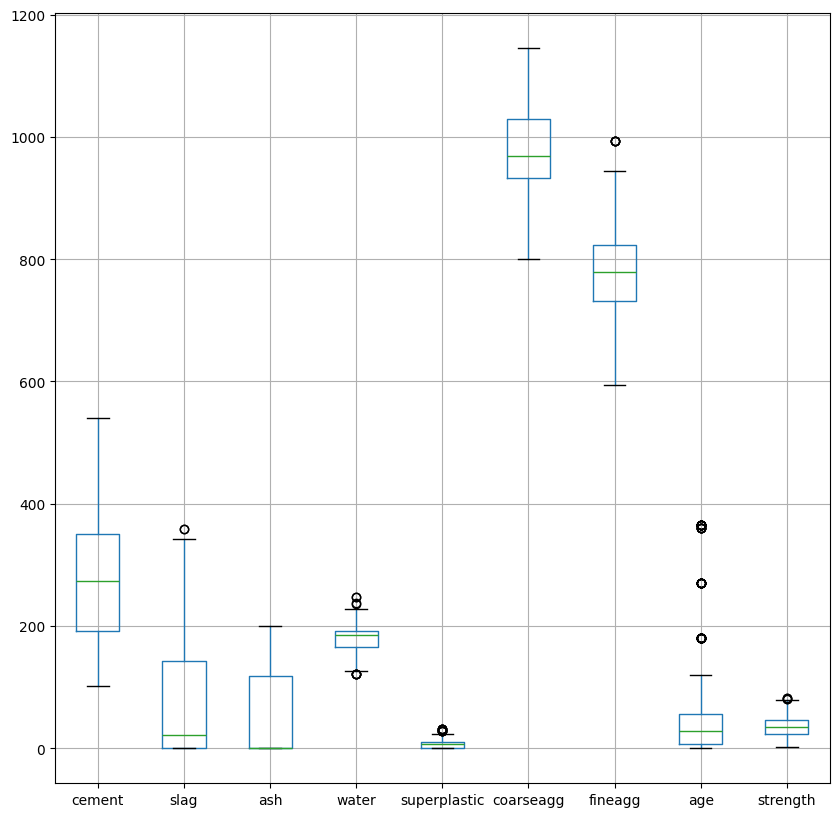

In [ ]:
df.boxplot(figsize=(10,10))

### Scaling/Removing the outliers

In [ ]:
df.isnull().sum()

,0
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
Y=df[["strength"]]
X=df.drop("strength",axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
model_lr=LinearRegression()

In [ ]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model_lr.score(X_train,Y_train)

0.6039063196603471

In [ ]:
model_lr.score(X_test,Y_test)

0.6368037607404144

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(max_depth=4)
model_dt.fit(X_train,Y_train)
model_dt.score(X_train,Y_train)

0.7406964218473178

In [ ]:
model_dt.score(X_test,Y_test)

0.6267832371619605

In [ ]:
from sklearn.ensemble import BaggingRegressor
model_bg=BaggingRegressor(max_samples=0.18,max_features=7)
model_bg.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(max_features=7, max_samples=0.18)

In [ ]:
model_bg.score(X_train,Y_train)

0.8579207986445618

In [ ]:
model_bg.score(X_test,Y_test)

0.8136679643176994

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model_ab=AdaBoostRegressor()
model_ab.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [ ]:
model_ab.score(X_train,Y_train)

0.8323055416096624

In [ ]:
model_ab.score(X_test,Y_test)

0.7776449166003071

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb=GradientBoostingRegressor()
model_gb.fit(X_train,Y_train)
model_gb.score(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.9542623725854742

In [ ]:
model_gb.score(X_test,Y_test)

0.894574311884519

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(X_train,Y_train)
model_rf.score(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9873240524379981

In [ ]:
model_rf.score(X_test,Y_test)

0.878343209968243

In [ ]:
## Outlier removal

In [ ]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
model_lr=LinearRegression()

In [ ]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model_lr.score(X_train,Y_train)

0.8135491863054068

In [ ]:
model_lr.score(X_test,Y_test)

0.8074833588417816

In [ ]:
model_dt=DecisionTreeRegressor(max_depth=4)
model_dt.fit(X_train,Y_train)
model_dt.score(X_train,Y_train)

0.8062520495137179

In [ ]:
model_dt.score(X_test,Y_test)

0.6949310647568714